# IN3050/IN4050 Mandatory Assignment 3, 2021: Unsupervised Learning

**Name:** Eirik Fredborg

**Username:** eefrebo

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.
</div>

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    

## Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.


### Principle of Maximum Variance: what is PCA supposed to do?
First of all, let us recall the principle/assumption of PCA:

1. What is the variance?
3. What is the covariance?
3. How do we compute the covariance matrix?
2. What is the meaning of the principle of maximum variance?
4. Why do we need this principle?
5. Does the principle always apply?
</div>

Variance is a measure of how much the data varies within its own parameter dimension. Covariance is the degree of variation for one parameter dimennsion with respect to another. We compute the covariance matrix using the realtion:

$$ \mathbf{C} = \frac{1}{N} \mathbf{X}^T \mathbf{X}$$

Where $\mathbf{X}$ is a vector containing N datapoints with some number of featues. The principle of maximum variance is that when compressing the data into fewer dimensions one projects the data into a dimension that will result in the largest variance. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

</div>

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.
    
</div>

In [1]:
import numpy as np
from numpy import newaxis as nax
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

import syntheticdata

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">


### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.
    
   </div>

In [2]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    return A - np.mean(A,0)[nax]

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

Test your function checking the following assertion on *testcase*:
    
    
</div>

In [3]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])

np.testing.assert_array_almost_equal(center_data(testcase), answer)

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.
    
    
    
</div>
    

In [4]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    return 1/A.shape[0]*(A.T@A)

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

Test your function checking the following assertion on *testcase*:
    
</div>

In [5]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!
    
</div>

In [6]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix (not NxD?)
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    eigval, eigvec = np.linalg.eig(A)
    
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

Test your function checking the following assertion on *testcase*:
    
</div>

In [7]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.
    
</div>

In [8]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    sorted_eigval = np.flip(np.sort(eigval)) # sorting from large to small
    #looping over the sorted eigenvalues and and sorting the eigenvectors by pairing them to their eigenvalues
    sorted_eigvec = np.array(([(eigvec[:,np.where(eigval == val)[0][0]]).tolist() for val in sorted_eigval])).T
    
    return sorted_eigval, sorted_eigvec

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

Test your function checking the following assertion on *testcase*:
    
</div>

In [9]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.
    
    
</div>

In [10]:
def pca(A,m, test=False):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    cov = compute_covariance_matrix(A)
    eigval, eigvec = compute_eigenvalue_eigenvectors(cov) # computing eigvals and eigvecs from cov matrix
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    if test== True:
        pca_eigvec = np.array((eigvec[:,0], eigvec[:,-1])).T
    else:
        pca_eigvec = sorted_eigvec[:,:m]
    P = A@pca_eigvec
    return pca_eigvec, P

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

Test your function checking the following assertion on *testcase*:
    
</div>

In [11]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2, test=True)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)
test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))

test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))

np.testing.assert_almost_equal(test_arr_y, 0)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 52.699620491992164
 DESIRED: 0

The pca function is given an extra feature to make it work with the test case which happens to have two equal eigenvalues. After some trial and error i just made the function chose the eigenvector that made the test for eigenvectors work. I did however not make it work for the pca matrix. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).
    
</div>

In [12]:
X = syntheticdata.get_synthetic_data1()

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.
    
</div>

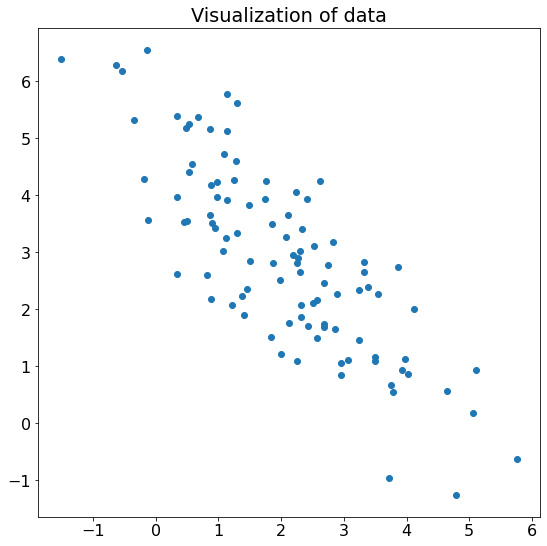

In [13]:
plt.figure(figsize=(9,9))
plt.title('Visualization of data')
plt.scatter(X[:,0],X[:,1])
plt.show()

Above we have a simple scatter plot to visualize the data.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.
    
    
    
</div>

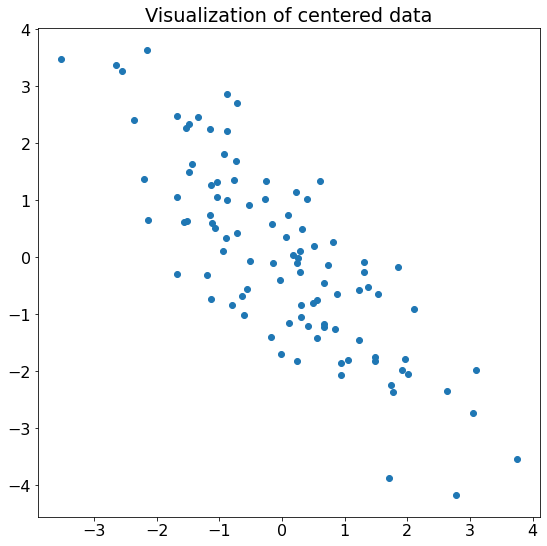

In [14]:
X = center_data(X)
plt.figure(figsize=(9,9))
plt.title('Visualization of centered data')
plt.scatter(X[:,0],X[:,1])
plt.show()

The data is centered and visualized again.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.
    
</div>

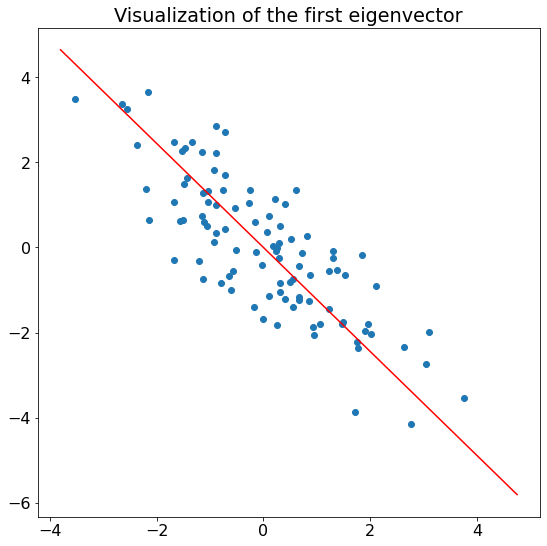

In [15]:
eigvec = pca(X,2)[0]

plt.figure(figsize=(9,9))
plt.title('Visualization of the first eigenvector')
plt.scatter(X[:,0],X[:,1])
plt.plot([-6*eigvec[0,0],7.5*eigvec[0,0]], [-6*eigvec[0,1],7.5*eigvec[0,1]], c='red')
plt.show()

The first eigenvector spanning the dimension which results in the maximal variance is presented above.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.
    
</div>

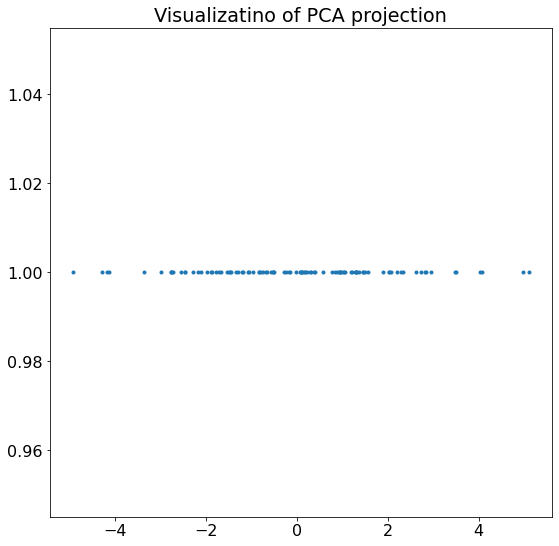

In [16]:
P = pca(X,1)[1]
plt.figure(figsize=(9,9))
plt.title('Visualizatino of PCA projection')
plt.plot(P,np.ones(len(P)), '.')
plt.show()

In the figure above we see the data presented after being projected into the dimension of maximum variance. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.
    

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.
    
</div>

In [17]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.
    
</div>

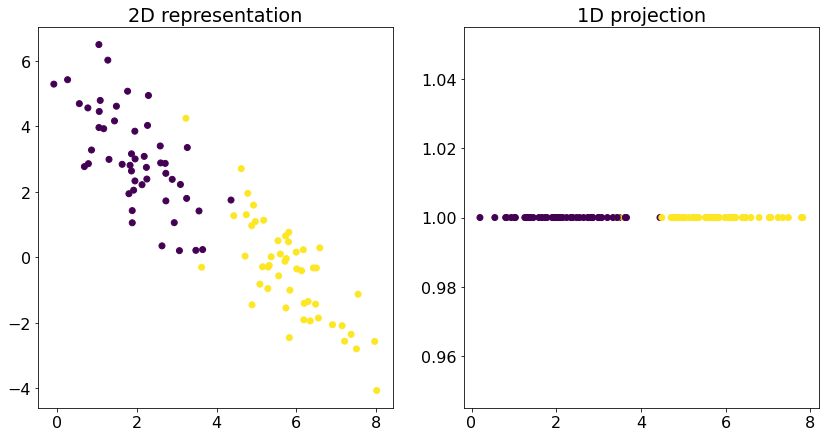

In [18]:


plt.figure(figsize=(14,7))

plt.subplot(121)
plt.title('2D representation')
plt.scatter(X[:,0],X[:,1],c=y[:,0])

P = pca(X,1)[1]
plt.subplot(122)
plt.title('1D projection')
plt.scatter(P,np.ones(P.shape[0]),c=y[:,0])

plt.show()

On the left we have the raw 2D representation of the data, while on the right the data are projected into one dimension before visualized. The two classes appear to be separated and should be quite simple to classify.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.
    
</div>

In [19]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.
    
</div>

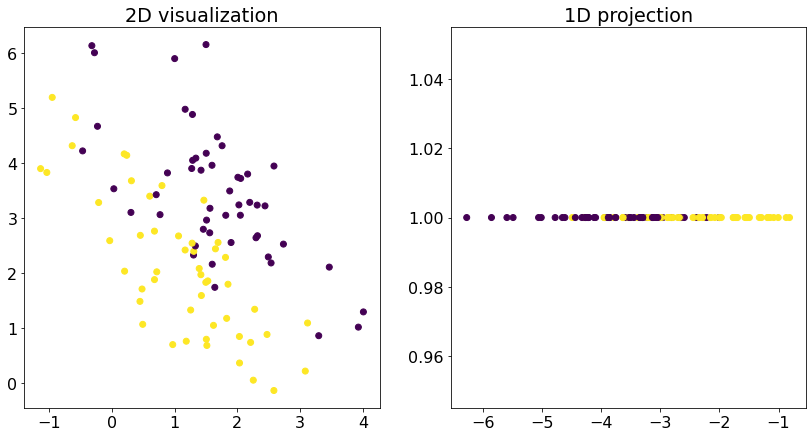

In [20]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.title('2D visualization')
plt.scatter(X[:,0],X[:,1],c=y[:,0])

plt.subplot(122)
plt.title('1D projection')
P = pca(X,1)[1]
plt.scatter(P,np.ones(P.shape[0]),c=y[:,0])
plt.show()

As apposed to the previous data set which could easliy be saparated in the projected dimension, this dataset happens to be oriented in such a way that a projection into the dimension resulting in maximum variance will make the classification much harder. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?
    
</div>

The two classes would be much simpler to distinguish if the data were projected into the second eigenvector. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.
    

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].
    
</div>

In [21]:
X,y = syntheticdata.get_iris_data()

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.
    
</div>

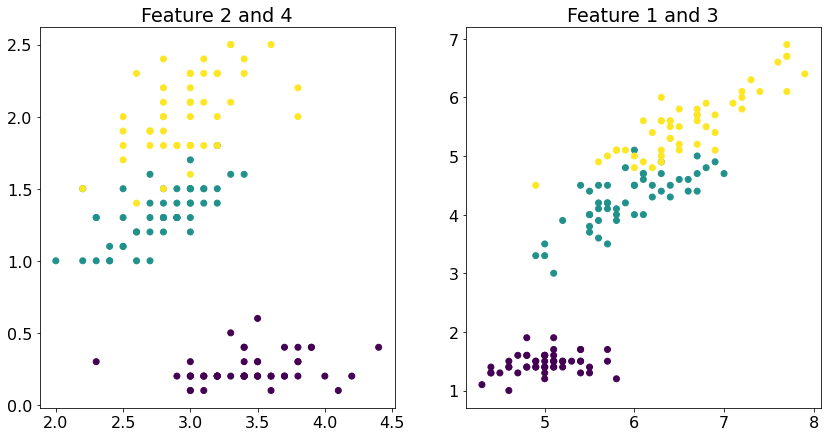

In [22]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.title('Feature 2 and 4')
plt.scatter(X[:,1], X[:,3], c = y[:])

plt.subplot(122)
plt.title('Feature 1 and 3')
plt.scatter(X[:,0], X[:,2], c = y[:])

plt.show()

Feature 2 and 4 are visialized in the left figure, while feature 1 and 3 are visualized in the right figure. The data appears to be distributed with a regular distanse between the datapoints. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.
    
</div>

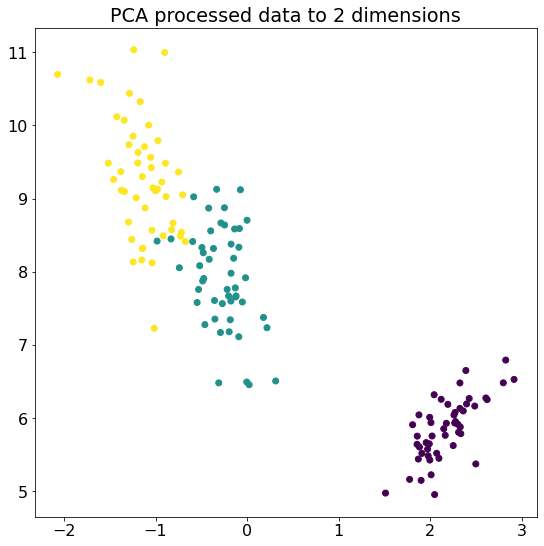

In [23]:
P = pca(X,2)[1]

plt.figure(figsize=(9,9))
plt.title('PCA processed data to 2 dimensions')
plt.scatter(P[:,1],P[:,0], c=y[:])
plt.show()

The four features are compressed down to two features using the PCA method. The visualization above does not show the same regular distribution as before. The yellow and green feature has some overlap just as before the data were compressed.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 
    
</div>

In [24]:
X,y,h,w = syntheticdata.get_lfw_data()

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.
    
</div>

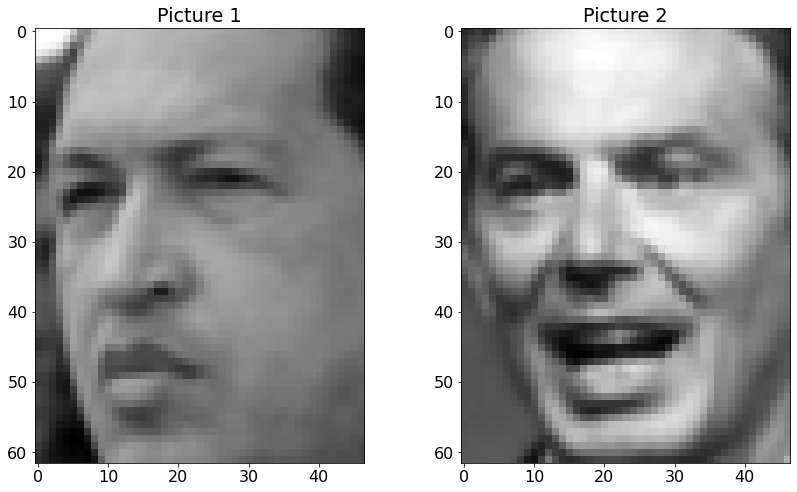

In [25]:
plt.figure(figsize = (14,8))
plt.subplot(121)
plt.title('Picture 1')
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(122)
plt.title('Picture 2')
plt.imshow(X[1,:].reshape((h, w)), cmap=plt.cm.gray)

plt.show()

The two first pixels are presented above and we can they contain the picture of faces. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.
    
</div>

In [26]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    cov = compute_covariance_matrix(A)
    eigval, eigvec = compute_eigenvalue_eigenvectors(cov) # computing eigvals and eigvecs from cov matrix
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    pca_eigvec = sorted_eigvec[:,:m]
    P = A@pca_eigvec
    Ahat = P@pca_eigvec.T
    return Ahat

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).
    
</div>

In [27]:
Xhat = encode_decode_pca(X,m=200)

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.
    
</div>

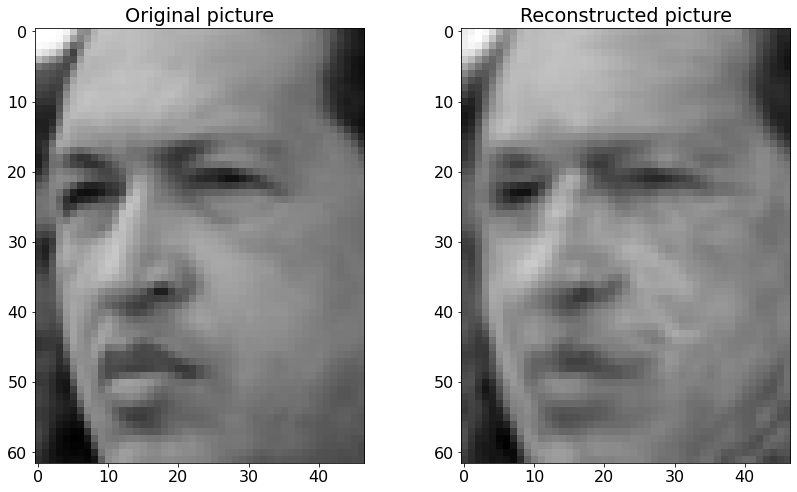

In [28]:
plt.figure(figsize = (14,8))
plt.subplot(121)
plt.title('Original picture')
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(122)
plt.title('Reconstructed picture')
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.show()

We see that the reconstructed picture loses some information, especially in the area were neighbouring pixels are similar. The compression-decompression also seem to smoothe away some of the contrast. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.
    
</div>

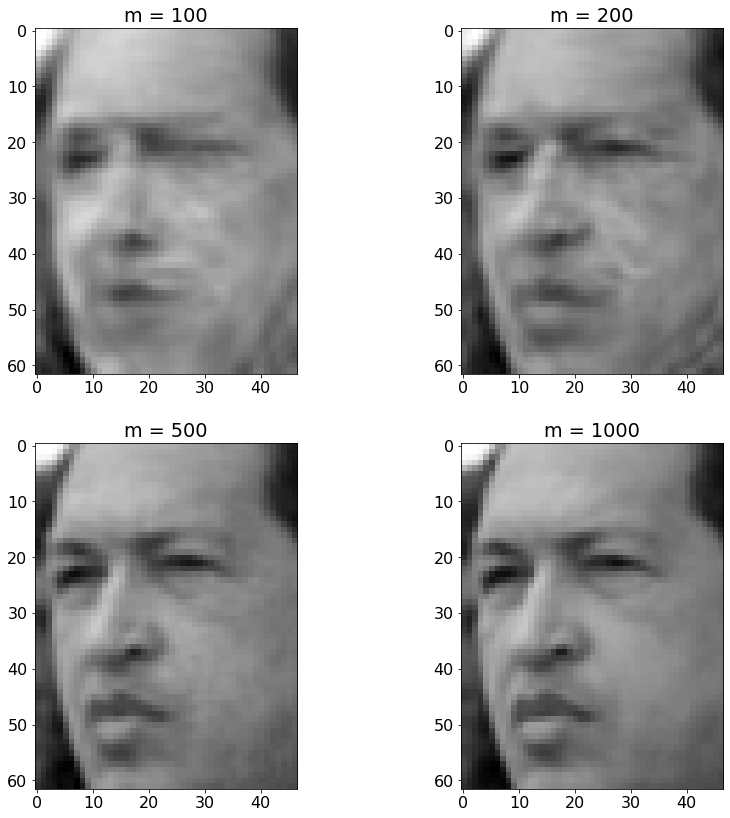

In [29]:
m_arr = np.array((100,200,500,1000))
plt.figure(figsize = (14,14))
plt.subplot(221)

plt.title(f'm = {m_arr[0]}')
plt.imshow(encode_decode_pca(X,m_arr[0])[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(222)
plt.title(f'm = {m_arr[1]}')
plt.imshow(encode_decode_pca(X,m_arr[1])[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(223)
plt.title(f'm = {m_arr[2]}')
plt.imshow(encode_decode_pca(X,m_arr[2])[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(224)
plt.title(f'm = {m_arr[3]}')
plt.imshow(encode_decode_pca(X,m_arr[3])[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.show()

When comparing the figures above to the original uncompressed image, it appears that m=1000 has not appearant loss of information. The case of m=500 might have some slight loss in the smooth areas. This indicate that to compress down to m=1000 features might be effective. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.
    
</div>

In [30]:
from sklearn.cluster import KMeans

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].
    
</div>

In [31]:
X,y = syntheticdata.get_iris_data()

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.
    
</div>

In [32]:
P = pca(X, m = 2)[1]

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.
    
</div>

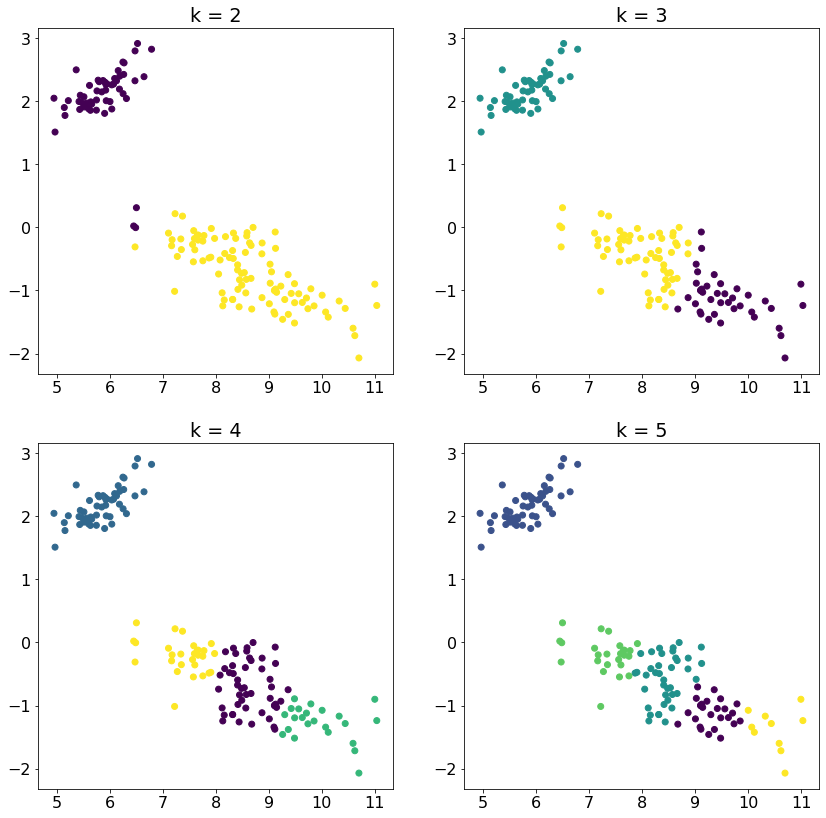

In [33]:
k_arr = np.array((2,3,4,5))
plt.figure(figsize=(14,14))
for i,k in enumerate(k_arr):
    KM = KMeans(n_clusters=k)
    yhat = KM.fit_predict(P)
    plt.subplot(2,2,i+1)
    plt.title(f'k = {k}')
    plt.scatter(P[:,0], P[:,1], c = yhat[:])
    
plt.show()


The results of the K-means clustering for $k=[2,3,4,5]$ clusters are presented above. 

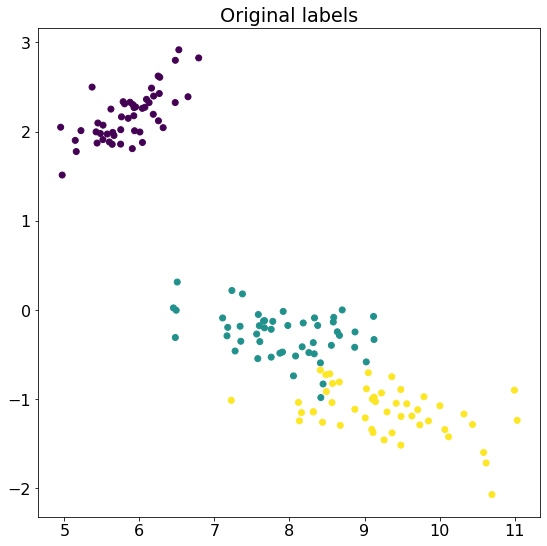

In [34]:
plt.figure(figsize=(9,9))
plt.title('Original labels')
plt.scatter(P[:,0], P[:,1], c = y[:])
plt.show()

The dataset with its original labels is presented above. When comparing to the results of the K-means clustering it is obvious that the case og k=3 is most similar to the original labeling. This being the only case where the number of clusters is the same it is not that surprising. This being the case makes it hard for me to understand the point of this comparison. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes outputed by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.
    
</div>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
X,y = syntheticdata.get_iris_data()
P = pca(X, m = 2)[1]

In [37]:
clf = LogisticRegression(random_state=0).fit(P, y)
acc = metrics.accuracy_score(y, clf.predict(P))
print(f'The accuracy of the training set using the true labels as targets is: {acc}')


The accuracy of the training set using the true labels as targets is: 0.9666666666666667


In [38]:
accuracies = np.zeros(len(k_arr))

for i, k in enumerate(k_arr):
    KM = KMeans(n_clusters=k)
    yhat = KM.fit_predict(P)
    clf = LogisticRegression(random_state=0, max_iter = 1e3).fit(P, yhat)
    accuracies[i] = metrics.accuracy_score(yhat, clf.predict(P))


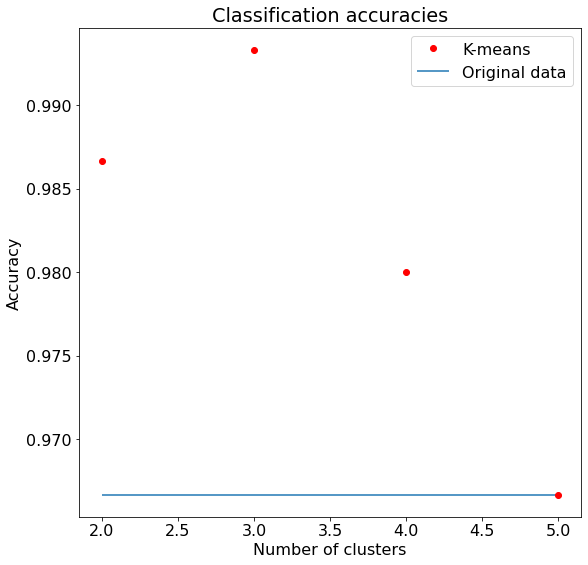

In [39]:
plt.figure(figsize=(9,9))
plt.title('Classification accuracies')
plt.hlines(acc, 2,5, label='Original data')
plt.plot(k_arr,accuracies, 'ro', label='K-means')
plt.ylabel('Accuracy')
plt.xlabel('Number of clusters')
plt.legend()
plt.show()

I was very confused when solving this problem. I'm not sure at all if I've solved it correctly, but this was the only way I could find to solve it and actually get presentable results. As far as I can tell the accuracy function does not measure the accuracy with respect to the "true" labels for various k. This not being the case I don's see what the point of this problem is, which again leads me to belive I have misunderstood the problem. 